# Car Sales Analysis

## Content 
1. Installing required Libraries
2. Importing required Libraries
3. Data Acquisition
4. Data Description
5. Data Information
6. Data Pre-Profiling
7. Queries to be performed
   
   7.1  What is customer segment based on body?
   
   7.2  what is the right time to launch a new car?
   
   7.3  what is Top 10 popular car brands?
   
   7.4  what is the sales and revenue in each class?
   
   7.5  what is the most popular car specification combination ?


8. Dashboard link

### 1. Installing required Libraries

In [ ]:
!pip install -q datascience

In [ ]:
!pip install -q pandas-profiling

In [ ]:
!pip install -q --upgrade pandas-profiling

In [ ]:
pip install --upgrade plotly

### 2. Importing required Libraries

In [21]:
import pandas as pd 
import pandas_profiling 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import webbrowser

### 3. Data Acquisition

features of the data set : 

| S.No. | Attributes | Description |
| --- | ---| --- |
| 01 | car | Brand name of car |
| 02 | model | Available car different Variants |
| 03 | price | 	Price of Car in $ |
| 04 | body | Body type-Hatchback, Sedan, Crossover etc |
| 05 | mileage | Mileage of car |
| 06 | engV | Engine version |
| 07 | engType | Car Fuel type - Petrol, Diesel, gas etc|
| 08 | PurchaseYear | Purchasing year |
| 09 | drive | Wheel Drive - Front, back, rear |
| 10 | PurchaseMonth | Purchasing month |

In [34]:
url = 'https://github.com/soma-v/Car-Sales-Analysis/blob/main/Car_A.csv?raw=true'
car = pd.read_csv(url, index_col=0)
print('Data Shape:', car.shape)
car.head()

Data Shape: (9463, 9)


,model,price,body,mileage,engV,engType,PurchaseYear,drive,PurchaseMonth
car,,,,,,,,,
Ford,Kuga,15500.0,crossover,68.0,2.50,Gas,2008,full,May
Mercedes-Benz,E-Class,20500.0,sedan,173.0,1.80,Gas,2011,rear,Jun
Mercedes-Benz,CL 550,35000.0,other,135.0,5.50,Petrol,2008,rear,Jul
Mercedes-Benz,B 180,17800.0,van,162.0,1.80,Diesel,2012,front,Nov
Mercedes-Benz,E-Class,33000.0,vagon,91.0,2.57,Other,2013,rear,Dec


### 4. Data Description

In [ ]:
car.describe() 

This Describe function gives us basic statistics computed on the dataset

1. All the 4 numerical columns has same values in count (all are 9463). Threfore,there is no missing data which should be cleansed.
2. None of the min value is '0' so there is no potential candidate for correction/discard the data.

### 5. Data Information

In [ ]:
car.info()

We can observe there is no missing/null values. If there would have been any then any missing values can be replaced with calculated values:
1. mean - For series of numerical values
2. mode - For series of numerical values with outliers

### 6. Data Pre-Profiling

In [ ]:
carsales_Profile = pandas_profiling.ProfileReport(car)
carsales_Profile.to_file("Car Sales.html")

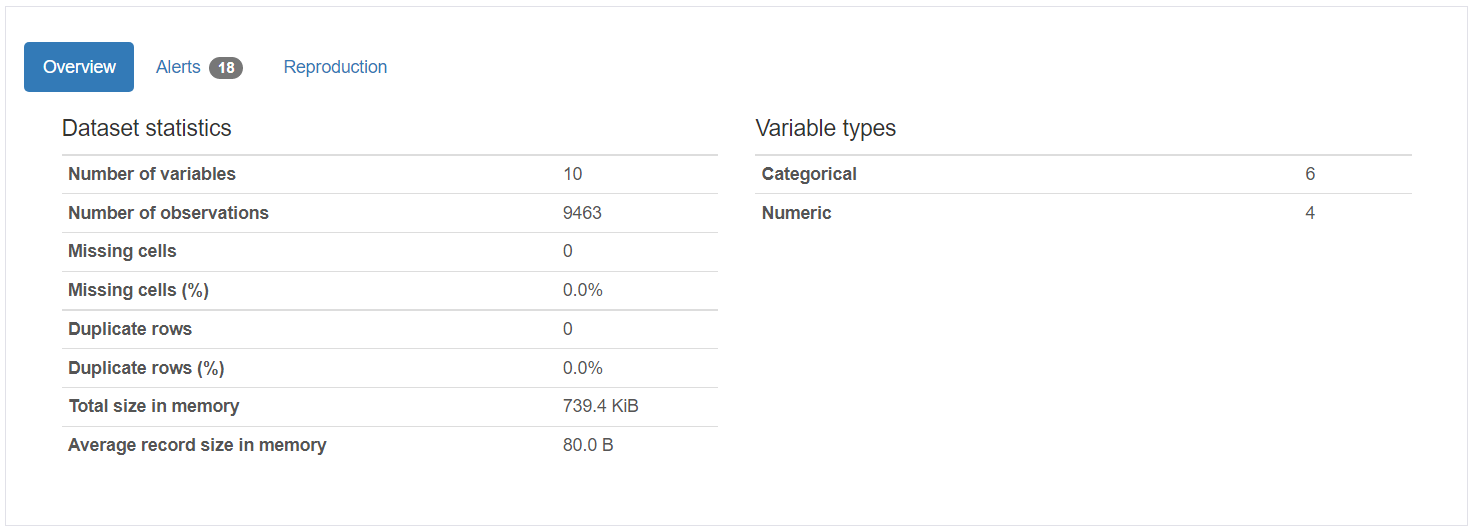


Profiing report describes as follows : 
1. There is no duplicated rows
2. 0% of missing cells are in the dataset
3. 6 Categorical attributes and 4 numeric attributes are there

### 7.1 What is customer segment based on body

           body
sedan      3622
crossover  2007
hatch      1248
van        1038
other       829


Text(0.5, 1.0, 'Customer segment based on body')

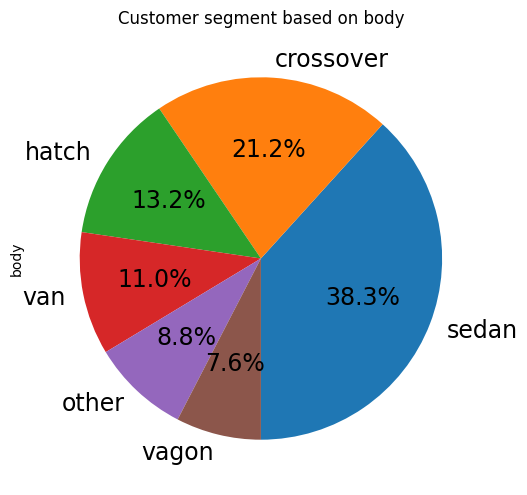

In [3]:
df = pd.DataFrame(car.body.value_counts())
print(df.head())
fig = plt.figure(figsize=(6,6), dpi=100)
ax1 = plt.subplot(111)

df.body.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=270, fontsize=17)
plt.title("Customer segment based on body")

Text(0.5, 1.0, 'Customer segment based on body')

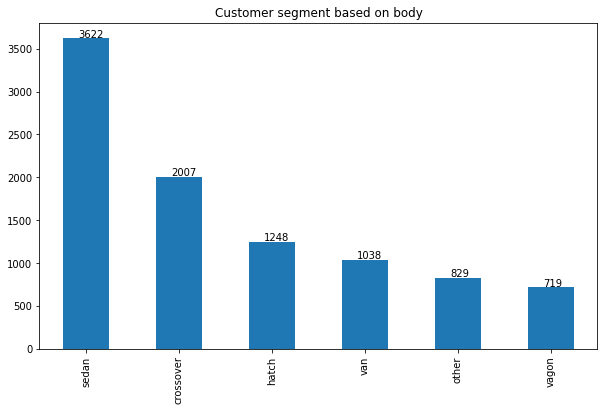

In [4]:
ax = car["body"].value_counts().plot.bar(figsize=(10,6))
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + (i.get_width()/3), i.get_height()+10), rotation=0)
    
plt.title("Customer segment based on body")

Observation : 

Most of the customer prefer sedan or crossover in body type 
38.3 % customer prefer sedan

21.2 % customer prefer crossover

13.2 % customer prefer hatch

11.0 % customer prefer van

8.8 % customer prefer other

7.6% customer prefer vagon

        engType
Petrol     4341
Diesel     2950
Gas        1710
Other       462


Text(0.5, 1.0, 'Customer segment based on engType')

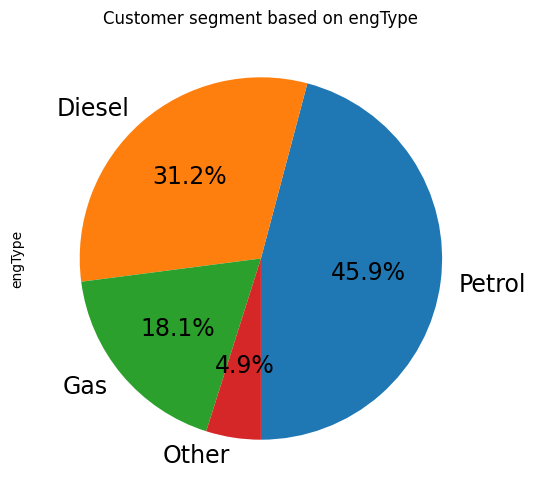

In [5]:
df1 = pd.DataFrame(car.engType.value_counts())
print(df1.head())
fig = plt.figure(figsize=(6,6), dpi=100)
ax1 = plt.subplot(111)

df1.engType.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=270, fontsize=17)
plt.title("Customer segment based on engType")

Text(0.5, 1.0, 'Customer segment based on engType')

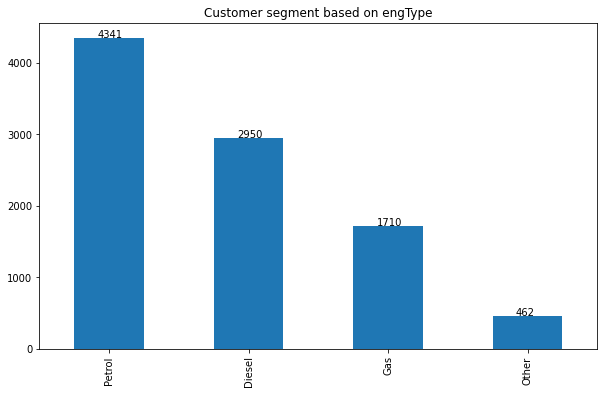

In [6]:
ax = car["engType"].value_counts().plot.bar(figsize=(10,6))
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + (i.get_width()/3), i.get_height()+10), rotation=0)
    
plt.title("Customer segment based on engType")

Observation : 

Most of the customer prefer petrol or diesel in engine type :

45.9 % customer prefer petrol

31.2 % customer prefer diesel

18.1 % customer prefer gas

4.9 % customer prefer other

### 7.2 what is the right time to launch a new car?

         body PurchaseMonth  car
0   crossover           Apr  170
1   crossover           Aug  171
2   crossover           Dec  149
3   crossover           Feb  156
4   crossover           Jan  168
..        ...           ...  ...
67        van           Mar   93
68        van           May  101
69        van           Nov   80
70        van           Oct   80
71        van           Sep   74

[72 rows x 3 columns]


Text(0.5, 1.0, 'Right time to launch a new car')

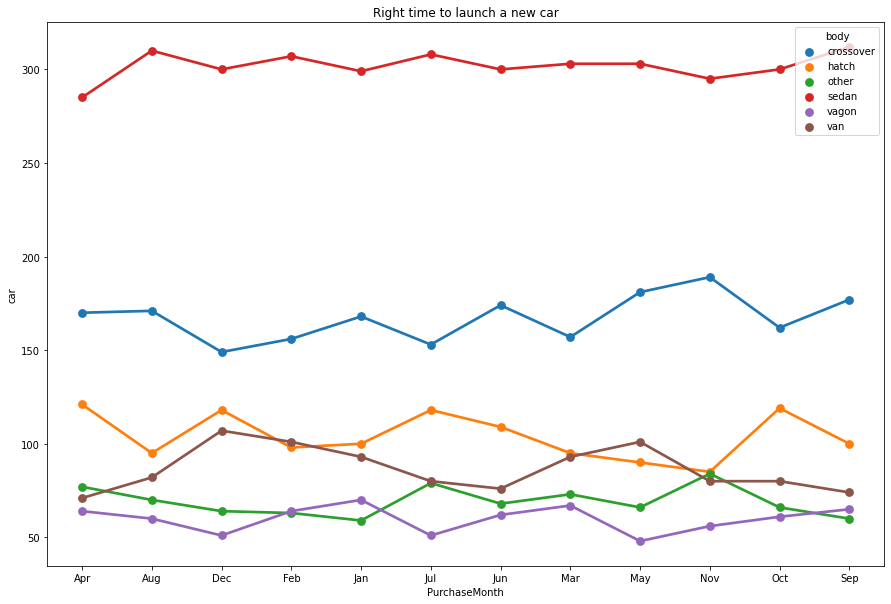

In [7]:
data = car.groupby(['body','PurchaseMonth'], as_index=False)['car'].count()
#data1 = car.groupby(['body','PurchaseYear'], as_index=False)['car'].count()
print(data)
fig, ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=data, x='PurchaseMonth', y='car',hue='body')
plt.title("Right time to launch a new car")

### Observation : 

Right time to launch new car :

1. For Crossover : November
2. For hatch : April
3. For sedan : september 
4. For vagon : January
5. For van : December 
6. For other : November



### 7.3 what is the Top 10 popular car brands ?

               car
Volkswagen     927
Mercedes-Benz  885
BMW            684
Toyota         529
VAZ            488


Text(0.5, 1.0, 'Top 10 popular car brands')

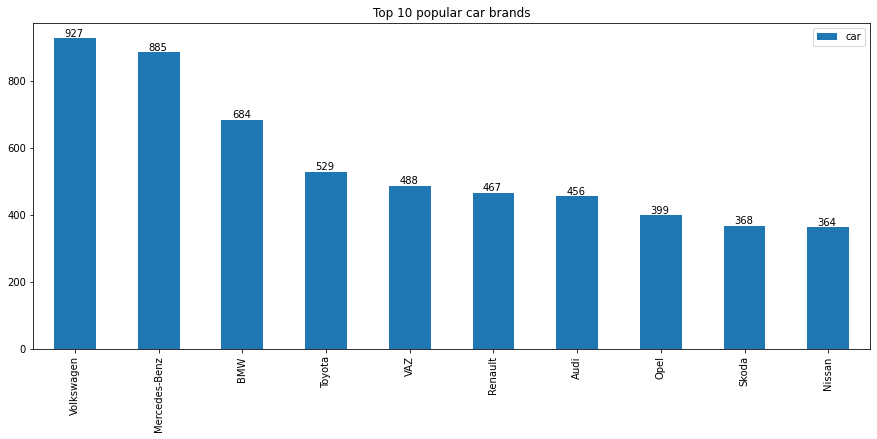

In [8]:
df2 = pd.DataFrame(car.car.value_counts())
print(df2.head())
ax = df2.head(10).plot.bar(figsize=(15,6))
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + (i.get_width()/4), i.get_height()+5), rotation=0)
    
plt.title("Top 10 popular car brands")

### Observation :

Top 10 popular car brands are :
1. Volkswagen
2. Mercedes-Benz
3. BMW
4. Toyota
5. Vaz
6. Renault
7. Audi
8. Opel
9. Skoda
10. Nissan

### 7.4 what is the sales and revenue in each class?

In [9]:

'''Fuction to find the class of the car based on price
    Economy - Price less than 10000 
    Luxury  - Price above 10000 and below 30000
    Premium - Price above 30000
'''
def classify_class(r):
    if r.price <= 10000:
        return "Economy"
    elif (r.price > 10000) & (r.price <= 30000):
        return "Luxury"
    else:
        return "Premium"


Text(0.5, 1.0, 'Car sales based on Class')

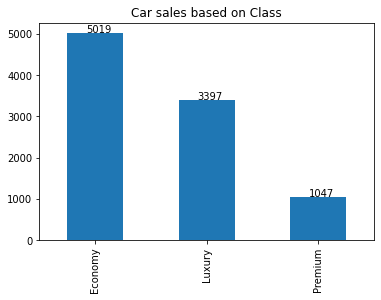

In [10]:
# Set new column called 'class' for defining the sement

car["class"] = car.apply(classify_class, axis=1)
ax = car["class"].value_counts().plot.bar(figsize=(6,4))
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + (i.get_width()/3), i.get_height()+10), rotation=0)
    
plt.title("Car sales based on Class")

AxesSubplot(0.260833,0.125;0.503333x0.755)


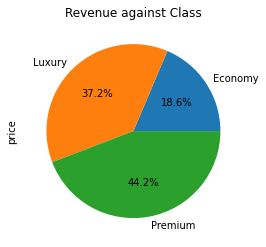

In [11]:
revenue = car.groupby('class').price.sum()
plt.title('Revenue against Class')
print(revenue.plot.pie(autopct='%1.1f%%'))

### Observations:

Economy Cars are best selling segment but the revenue is comparatively less

Revenues based on class :

1. Economy - 18.6%
2. Luxury - 37.2%
3. Premium - 44.2%

### 7.5 what is the most popular car specification combination 

Text(0.5, 1.0, 'Mileage vs Class')

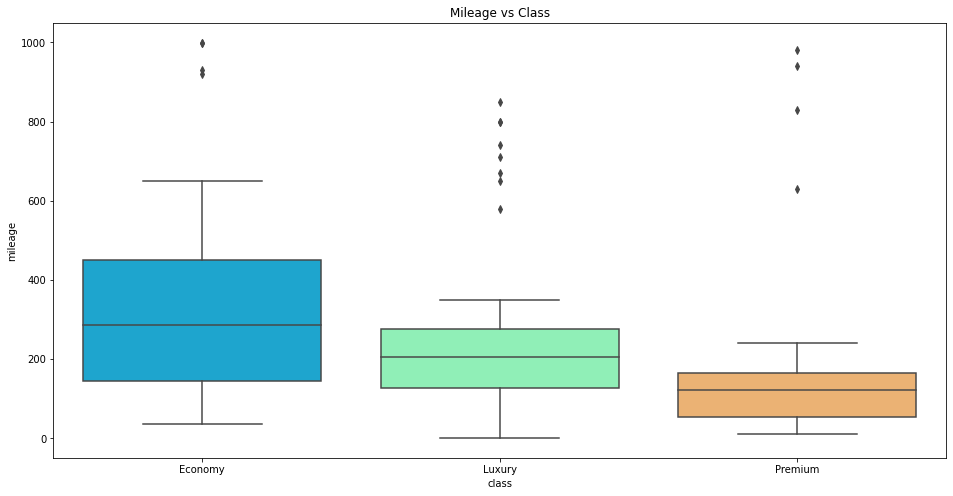

In [17]:
#the best mileage cars in each segment of class ?
economycar = car.pivot_table(index=['class','car'],  values="mileage", aggfunc='max')
economycar.reset_index(inplace=True)
# function to return upper whisker for mileage by class
def get_best_carandmileage_byclass(cls):
    mileage_c = economycar[economycar['class'] == cls]
    maxv = mileage_c.mileage.max()
    thirdQ = mileage_c.describe().iloc[6].mileage   
    firstQ = mileage_c.describe().iloc[4].mileage     
    iqr = thirdQ - firstQ
    upperwhisker = min(maxv, thirdQ + (1.5 * iqr))
    return upperwhisker

# function to get closest upper whisker milage results
def get_closest(cls, val):
    class_df = car[car['class'] == cls]
    return class_df.iloc[(class_df['mileage']-val).abs().argsort()[:2]]
plt.figure(figsize=(16, 8))
sns.boxplot(data=besteconomycars, x='class', y='mileage', palette='rainbow')
plt.title('Mileage vs Class')

Text(0, 0.5, 'Count of cars sold')

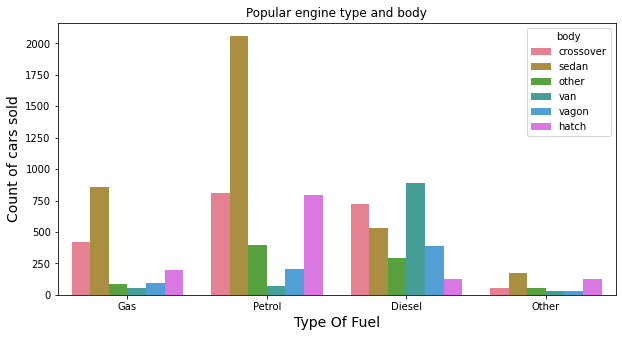

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="engType", hue= "body", palette="husl",data=car)
ax.set_title("Popular engine type and body",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Count of cars sold",fontdict= {'size':14})
#ticks = plt.setp(ax.get_xticklabels(),rotation=90)


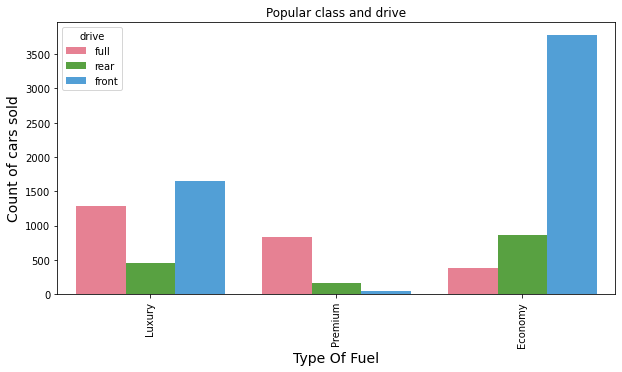

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="class", hue= "drive", palette="husl",data=car)
ax.set_title("Popular class and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Count of cars sold",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


### Observation:

sedan Economy class with front drive and type of fuel as patrol with average mileage around 315 is most popular car specification.

### 8. Dashboard link

In [24]:
#web application created using tableau with above visualization

# generate an URL
url = 'https://' + 'public.tableau.com/views/CarSalesAnalysis_16537389311120/Dashboard0?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link'
webbrowser.open(url)

True